# Circularity

Feature engineering is the combining features to create new ones.
Circularity is one of these features.

If a shape is circle we can calculate the radius by perimeter and by area.
But if the shape is not very circular the perimeter will give us a way bigger radius then the area.

We are gone use this to calculate the Circularity.

For the are the radius is
$$
Area = \pi * r_1^2
$$

$$
r_1 = \sqrt{\frac{Area}{\pi}}
$$

for the perimeter the radius is
$$
perimeter = \pi * r_2 * 2
$$

$$
r_2  = \frac{perimeter}{2 * \pi}
$$

The circularity is $(\frac{r_1}{r_2})^2$

$$
(\frac{r_1}{r_2})^2 = \frac{\frac{Area}{\pi}}{(\frac{perimeter}{2 * \pi})^2}=\frac{4 * \pi * Area}{perimeter^2}
$$

The metadata colony segmentation already has Area (`AreaShape_Area`) and perimeter (`AreaShape_Perimeter`).
So all we need to do is pop in this formula

In [1]:
from load_data import load_biobit_features

biobit_df = load_biobit_features()

In [2]:
from add_circularity import add_circularity
add_circularity(biobit_df)

In [3]:
biobit_df.head()

,ImageNumber,ObjectNumber,Metadata_Frame,Metadata_TimePoint,Metadata_Well,AreaShape_Area,AreaShape_BoundingBoxArea,AreaShape_BoundingBoxMaximum_X,AreaShape_BoundingBoxMaximum_Y,AreaShape_BoundingBoxMinimum_X,...,Texture_Variance_Phase_3_00_256,Texture_Variance_Phase_3_01_256,Texture_Variance_Phase_3_02_256,Texture_Variance_Phase_3_03_256,Texture_Variance_Phase_5_00_256,Texture_Variance_Phase_5_01_256,Texture_Variance_Phase_5_02_256,Texture_Variance_Phase_5_03_256,is_good,Circularity
Good_1_00d12h00m.tif,1724,1,0,00d12h00m,B6,1423,7597,735,2166,628,...,53.663936,55.347834,49.908811,52.515037,55.191058,58.169413,52.687000,51.290731,True,0.073007
Good_1_01d00h00m.tif,1727,1,0,01d00h00m,B6,1288,2624,141,1300,125,...,12.008065,12.129907,12.695967,12.009367,15.489024,15.462723,12.422264,15.426300,True,0.115610
Good_1_01d04h00m.tif,1728,1,0,01d04h00m,B6,2916,12420,193,1067,133,...,20.008065,20.190317,22.468556,20.122497,21.288325,22.808554,20.986270,20.334934,True,0.126914
Good_1_02d04h00m.tif,1734,1,0,02d04h00m,B6,1398,3312,1513,1244,1467,...,111.530891,114.122745,110.477651,113.082678,110.650754,113.107319,113.482992,117.162961,True,0.417064
Good_1_02d08h00m.tif,1735,1,0,02d08h00m,B6,1683,4180,1521,1251,1466,...,68.333459,69.967787,69.727323,68.747062,68.624614,67.173322,70.372928,68.000640,True,0.389920


<AxesSubplot:title={'center':'Circularity'}, xlabel='is_good'>

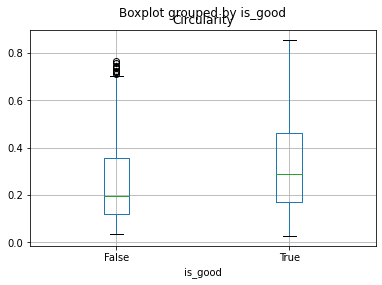

In [4]:
biobit_df.boxplot(column=['Circularity'], by='is_good')

In [5]:
from scipy.stats import ttest_ind

good_circularity = biobit_df[biobit_df['is_good']==True].Circularity
bad_circularity = biobit_df[biobit_df['is_good']==False].Circularity

ttest_ind(good_circularity, bad_circularity)

Ttest_indResult(statistic=7.686124530319115, pvalue=1.899909949885333e-14)

## Conclusion

The circularity seems to be an indicator of good and bad colonies.
So it might be worth is to add it to our feature list.